In [1]:
!pip install "tensorflow_hub>=0.6.0"
!pip install "tensorflow>=2.0.0"

     |████████████████████████████████| 101 kB 6.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 14.6 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 61.6 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 509 kB/s  eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0
  Attempting uninstall: requests
    Found existing installation: requests 2.19.1
    Uninstalling requests-2.19.1:
      Successfully uninstalled requests-2.19.1
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [35]:
import tensorflow as tf
import tensorflow_hub as hub

In [36]:
module_url_span = "https://tfhub.dev/google/tf2-preview/nnlm-es-dim50-with-normalization/1"
module_url_port = "https://tfhub.dev/google/wiki40b-lm-pt/1"

In [ ]:
embed = hub.KerasLayer(module_url)

## Load data

In [77]:
import pandas as pd

In [78]:
features_path = '../data/splitted_dataset/train_0_features_.csv'
target_path = '../data/splitted_dataset/train_0_target_.csv'

In [79]:
features = pd.read_csv(features_path)
target = pd.read_csv(target_path)

In [80]:
joined_data = features.merge(target, on='id', how='inner')

## Create Dataset

In [81]:
spanish_data = joined_data[joined_data.language == 'spanish']

In [218]:
selected_categories = ['FOOTBALL_KITS', 'FOOTBALL_SHIRTS', 'BATHROOM_FAUCET_SETS', 'BATHROOM_VANITIES', 'CAMERAS', 'CELLPHONES']
spanish_data['is_selected'] = spanish_data.category.apply(lambda x: x in selected_categories)
spanish_selected = spanish_data[spanish_data.is_selected == True]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
mini_data = spanish_selected.sample(800)

In [201]:
mini_data

,Unnamed: 0_x,id,title,label_quality,language,Unnamed: 0_y,category,is_selected
12890232,636487,636487,Camiseta Rosario Central Penalty Consultar Stock,unreliable,spanish,636487,FOOTBALL_SHIRTS,True
11289246,18186377,18186377,Conjunto Holanda 2017,unreliable,spanish,18186377,FOOTBALL_KITS,True
3817676,6797397,6797397,Camiseta adidas Retro Colombia 1990,unreliable,spanish,6797397,FOOTBALL_SHIRTS,True
6436943,1636404,1636404,Deportivo Armenio Conmemorativa 30 Años Ascens...,unreliable,spanish,1636404,FOOTBALL_SHIRTS,True
1268983,2754369,2754369,Buzo Arquero Barovero Utileria Copa Libertadores,unreliable,spanish,2754369,FOOTBALL_SHIRTS,True
8756638,17887695,17887695,Camiseta De Independiente Nueva 2016,reliable,spanish,17887695,FOOTBALL_SHIRTS,True
6471847,1711617,1711617,Conjuntos adidas Originales 3/ 4 Años,unreliable,spanish,1711617,FOOTBALL_KITS,True
11464728,5922101,5922101,Camiseta adidas Argentina Lanzini #15 Suplente...,unreliable,spanish,5922101,FOOTBALL_SHIRTS,True
11185325,17651209,17651209,Conjunto Seleccion Alemania Niños (camiseta + ...,unreliable,spanish,17651209,FOOTBALL_KITS,True
1586784,16683816,16683816,Camiseta Partido Homenaje A Ortega En San Juan,unreliable,spanish,16683816,FOOTBALL_SHIRTS,True


In [220]:
mini_data = mini_data[['title', 'category']]

In [221]:
titles = mini_data.title.tolist()
categories = mini_data.category.tolist()

In [222]:
embeddings_1 = embed(titles)

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

In [44]:
from pandas.plotting import parallel_coordinates

In [161]:
embeddings_1

<tf.Tensor: shape=(800, 50), dtype=float32, numpy=
array([[-0.09931138,  0.07367206,  0.26595265, ..., -0.00348014,
         0.01147919,  0.2603169 ],
       [ 0.09384441, -0.15450992,  0.34669334, ...,  0.1491093 ,
        -0.21645816,  0.39386714],
       [-0.08173253, -0.01753641,  0.5779783 , ...,  0.19579093,
        -0.32050493,  0.3702839 ],
       ...,
       [-0.26033756,  0.05485933,  0.41316482, ...,  0.38738915,
        -0.23094858, -0.33321476],
       [-0.07088394,  0.0291848 ,  0.3890382 , ..., -0.02365284,
        -0.08776546,  0.33798236],
       [-0.21932276,  0.14027126,  0.3643006 , ...,  0.44994536,
         0.00894516, -0.08027492]], dtype=float32)>

In [223]:
X = pd.DataFrame(embeddings_1)
#X_norm = (X - X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X))

In [227]:
colors = {'CELLPHONES':'green', 'FOOTBALL_SHIRTS':'orange', 'FOOTBALL_KITS':'red', 'BATHROOM_FAUCET_SETS':'blue', 'BATHROOM_VANITIES':'lightblue', 'CAMERAS':'black'}

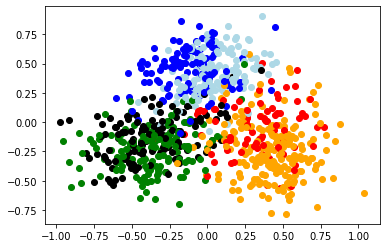

<Figure size 1080x1440 with 0 Axes>

In [228]:
from matplotlib.font_manager import FontProperties

fig = plt.figure()
ax = plt.subplot(111)


for i, y in enumerate(transformed.iterrows()):
    plt.scatter(y[1][0], y[1][1], label=categories[i], c=colors[categories[i]])


plt.figure(figsize=(15,20))
plt.show()

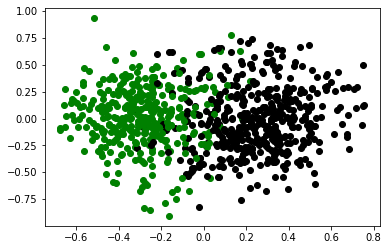

<Figure size 1080x1440 with 0 Axes>

In [217]:
from matplotlib.font_manager import FontProperties

fig = plt.figure()
ax = plt.subplot(111)


for i, y in enumerate(transformed.iterrows()):
    plt.scatter(y[1][0], y[1][1], label=categories[i], c=colors[categories[i]])


plt.figure(figsize=(15,20))
plt.show()

In [31]:
class Transformer:
    def __init__(self, model):
        self.model = model

    def transform(self, x):
        return self.model(x)

    def fit(self, x, y):
        return self

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression  # use any classifier

items = ["Iphone 7plus 256gb", "Chevrolet Corsa usado"]
targets = ["celular", "auto"]


In [32]:
model = make_pipeline(
    Transformer(embed),
    LogisticRegression(),
)
model.fit(items, targets)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array(['celular'], dtype='<U7')

In [34]:
model.predict(["7plus xs"])

array(['celular'], dtype='<U7')